In [3]:
import cv2

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import logging
import datetime

from src.parse_dataset import parse_invisible_eye_dataset, load_invisible_eye_dataset, save_invisible_eye_dataset, gaze_pix2deg

In [4]:
def setup_logging():
    formatter = logging.Formatter(fmt='%(asctime)s %(levelname)-8s %(message)s',
                                      datefmt='%Y-%m-%d %H:%M:%S')
    logger = logging.getLogger()
    logging.debug('test')
    logger.setLevel(logging.INFO)
    logger.handlers[0].setFormatter(formatter)

    filename = str(Path('logs') / datetime.datetime.now().strftime('logfile' + __name__ + '_%H_%M_%d_%m_%Y.log'))

    file_handler = logging.FileHandler(filename, mode='w')
    file_handler.setFormatter(formatter)
    logger.addHandler(file_handler)
setup_logging()

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
dataset_path = Path(r"D:\Datasets\EyeTracking\InvisibleEye")

resize_shapes = [(1, 1), (2, 2), (3, 3), (5, 5), (7, 7), (10, 10), (15, 15), (20, 20)]

In [21]:
image_path = dataset_path / '1' / 'train' / '0' / '100.png'

In [22]:
img = cv2.imread(str(image_path))

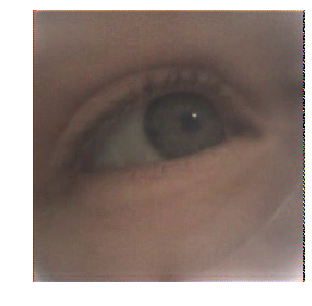

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_axis_off()

In [194]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[
      img.shape[0] // 4: img.shape[0] * 3 // 4, img.shape[1] // 4: img.shape[1] * 3 // 4
      ]

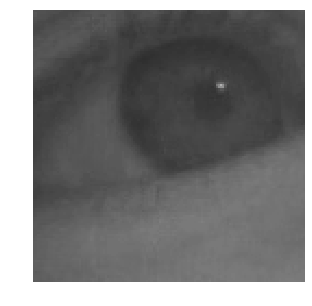

In [196]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img, cmap='gray', vmin=0, vmax=255)
ax.set_axis_off()

In [197]:
img = cv2.resize(img, (3, 3))

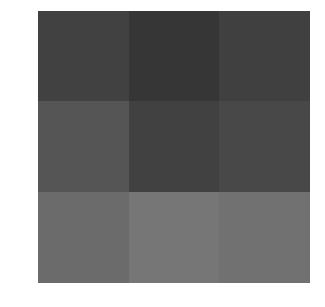

In [198]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img, cmap='gray', vmin=0, vmax=255)
ax.set_axis_off()

In [31]:
img1 = img.copy()

In [40]:
img1[img1.shape[0]//4, img1.shape[1]//4:3*img1.shape[1]//4 + 1] = 0
img1[3 * img1.shape[0]//4, img1.shape[1]//4:3*img1.shape[1]//4 + 1] = 0
img1[img1.shape[0]//4:3*img1.shape[0]//4 + 1, img1.shape[1]//4] = 0
img1[img1.shape[0]//4:3*img1.shape[0]//4 + 1, 3*img1.shape[1]//4] = 0

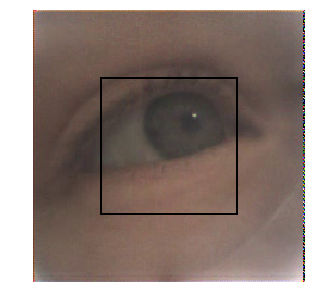

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax.set_axis_off()

In [25]:
X_train, y_train, X_test, y_test = parse_invisible_eye_dataset(dataset_path, resize_shapes)

03-05-19 18:52:46: Processing subject 0
03-05-19 18:52:46: N train: 8693, N test: 7965
03-05-19 18:56:50: Camera 0. N train: 7965, N test: 8693
03-05-19 19:03:04: Camera 1. N train: 7965, N test: 8693
03-05-19 19:08:52: Camera 2. N train: 7965, N test: 8693
03-05-19 19:14:42: Camera 3. N train: 7965, N test: 8693
03-05-19 19:14:42: Processing subject 1
03-05-19 19:14:42: N train: 8846, N test: 7967
03-05-19 19:19:37: Camera 0. N train: 7967, N test: 8846
03-05-19 19:24:12: Camera 1. N train: 7967, N test: 8846
03-05-19 19:28:45: Camera 2. N train: 7967, N test: 8846
03-05-19 19:32:46: Camera 3. N train: 7967, N test: 8846
03-05-19 19:32:46: Processing subject 2
03-05-19 19:32:46: N train: 8832, N test: 7921
03-05-19 19:36:35: Camera 0. N train: 7921, N test: 8832
03-05-19 19:40:17: Camera 1. N train: 7921, N test: 8832
03-05-19 19:43:58: Camera 2. N train: 7921, N test: 8832
03-05-19 19:47:36: Camera 3. N train: 7921, N test: 8832
03-05-19 19:47:36: Processing subject 3
03-05-19 19:47:

# Analysis

In [55]:
import itertools
import seaborn as sns
import pickle
import pandas as pd

In [44]:
use_cameras_configs = [list(i) for i in itertools.product([0, 1], repeat=4)][1:]

In [87]:
def use_cameras_tostr(use_cameras):
    return int(''.join([str(i + 1) for i in range(len(use_cameras)) if use_cameras[i]]))

In [88]:
str_use_cameras = [use_cameras_tostr(use_cameras) for use_cameras in use_cameras_configs]

In [52]:
with open('res_original.pickle', 'rb') as f:
    res_original = pickle.load(f)

In [103]:
with open('res_original_concat.pickle', 'rb') as f:
    res_original_concat = pickle.load(f)

In [104]:
with open('res_original_modified_small.pickle', 'rb') as f:
    res_original_small = pickle.load(f)

In [105]:
with open('res_original_modified_small_concat.pickle', 'rb') as f:
    res_original_small_concat = pickle.load(f)

In [232]:
with open('res_cnn_long.pickle', 'rb') as f:
    res_cnn = pickle.load(f)

In [200]:
with open('res_cnn_long_concat.pickle', 'rb') as f:
    res_cnn_concat = pickle.load(f)

In [ ]:
df_original = pd.DataFrame(res_original[:, :, -1], index=str_use_cameras, columns=range(1, res_original.shape[1] + 1))

df_original = df_original.sort_index()

In [231]:
def plot_results(res, str_use_cameras, title):
    df = pd.DataFrame(res[:, :, -1], index=str_use_cameras, columns=range(1, res.shape[1] + 1))
    df = df.sort_index()
    
    fig, ax = plt.subplots(figsize=(10, 7))

    sns.barplot(data=df.T, capsize=.2, ax = ax)
    ax.set_xlabel("Camera Combinations", fontsize=20)
    ax.set_ylabel("Gaze Estimation Error in Degrees", fontsize=20)
    ax.set_title(title, fontsize=20);
    ax.set_ylim(0, 14)
    ax.axhline(11.16104038, linestyle='--', color='r')
    for i in ax.patches:
        i.set_width(0.95)
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03, 1, \
                '{0:.2f}'.format(i.get_height()), fontsize=15, color='black')

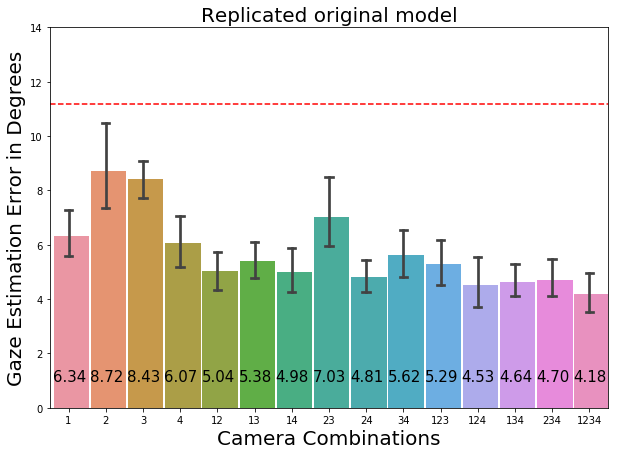

In [189]:
plot_results(res_original, str_use_cameras, "Replicated original model")

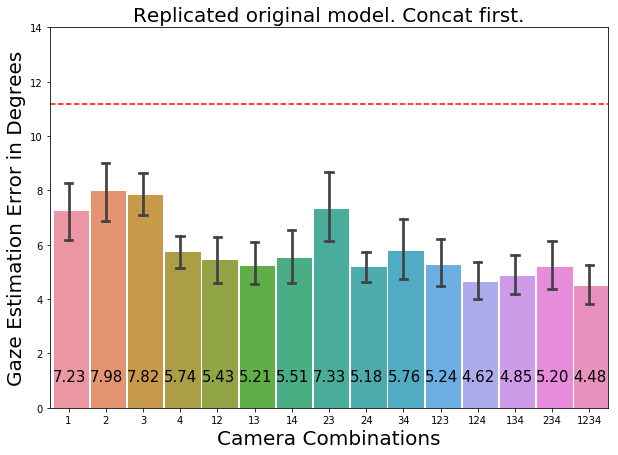

In [190]:
plot_results(res_original_concat, str_use_cameras, 'Replicated original model. Concat first.')

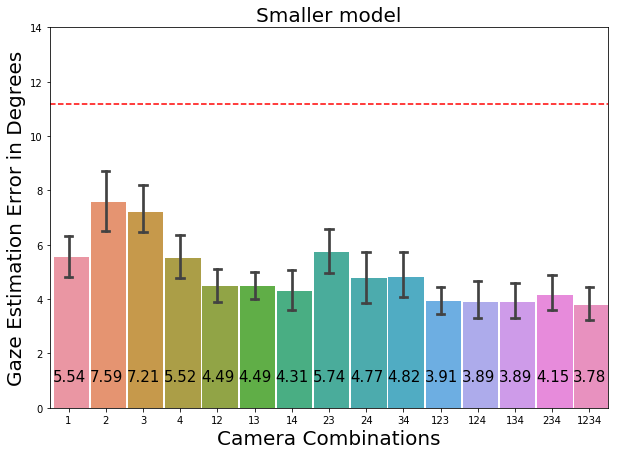

In [191]:
plot_results(res_original_small, str_use_cameras, 'Smaller model')

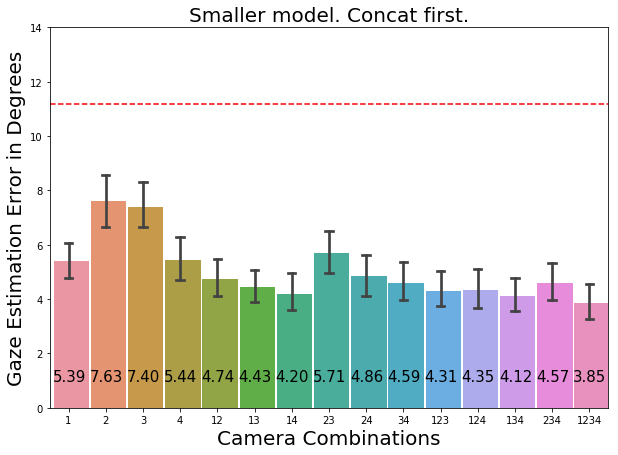

In [192]:
plot_results(res_original_small_concat, str_use_cameras, 'Smaller model. Concat first.')

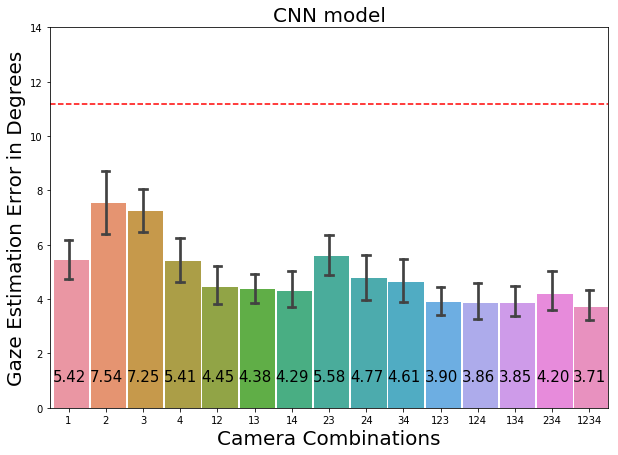

In [233]:
plot_results(res_cnn, str_use_cameras, 'CNN model')

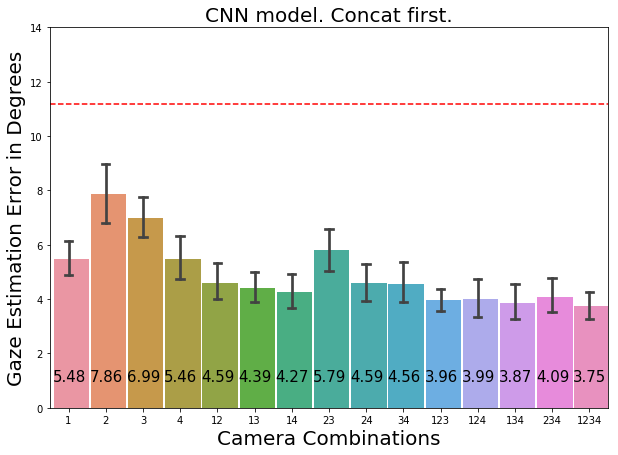

In [201]:
plot_results(res_cnn_concat, str_use_cameras, 'CNN model. Concat first.')

C:\Users\v_p164\AppData\Local\Continuum\anaconda3\envs\keras\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 14)

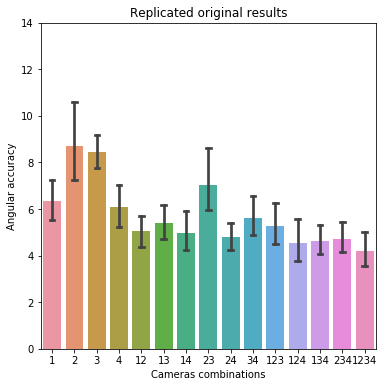

In [99]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(data=df_original.T, capsize=.2, ax = ax)
ax.set_xlabel("Cameras combinations")
ax.set_ylabel("Angular accuracy")
ax.set_title("Replicated original results");
ax.set_ylim(0, 14)

In [67]:
plt.show()